# Analytical analysis #

In [2]:
import sympy
sympy.init_printing()

In [3]:
x = sympy.Symbol('x', real=True)
y = sympy.Symbol('y', real=True)
x0 = sympy.Symbol('x_0', real=True)
sx = sympy.Symbol('s_x', real=True)
intensity = sympy.Symbol('I', real=True)
phase = sympy.Symbol(r'\varphi', real=True)
a2 = sympy.Symbol('a_2', real=True)
a3 = sympy.Symbol('a_3', real=True)
offset = sympy.Symbol('y_0', real=True)

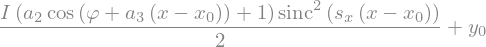

In [4]:
dx = x - x0
sdx = sx * dx
    
sinc_val = sympy.sinc(sdx)
term1 = sympy.Rational(1, 2) * sinc_val**2
term2_inner = a2 * sympy.cos(a3 * dx + phase)
term2 = 1 + term2_inner 
    
y = intensity * term1 * term2 + offset
y

## Compute Derivatives ##

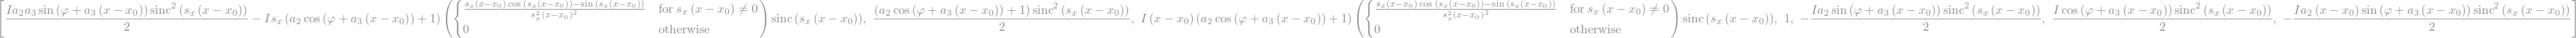

In [5]:
dy_dx0 = sympy.diff(y, x0)
dy_dI = sympy.diff(y, intensity)
dy_dxs = sympy.diff(y, sx)
dy_dy0 = sympy.diff(y, offset)
dy_dphase = sympy.diff(y, phase)
dy_da2 = sympy.diff(y, a2)
dy_da3 = sympy.diff(y, a3)

derivs = [
    dy_dx0,
    dy_dI,
    dy_dxs,
    dy_dy0,
    dy_dphase,
    dy_da2,
    dy_da3,
]
derivs

### Simplify expressions ###

In [6]:
dx_r = sympy.Symbol('dx', real=True)
dxs_r = sympy.Symbol('sdx', real=True) #hier stand dxs statt sdx 
cr = sympy.Symbol('cr', real=True)
cr2 = sympy.Symbol('cr_2', real=True)
scr = sympy.Symbol('scr', real=True)
ccr = sympy.Symbol('ccr', real=True)

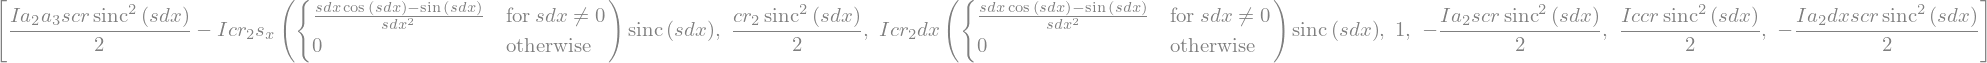

In [7]:
derivs=[
    term.subs(x, dx_r + x0)
    .subs(dx_r * sx, dxs_r)
    .subs(phase + a3 * dx_r, cr) 
    .subs(a2 * sympy.cos(cr) + 1, cr2)
    .subs(sympy.sin(cr), scr)
    .subs(sympy.cos(cr), ccr)
    for term in derivs
]
derivs

## Compute log derivatives ##

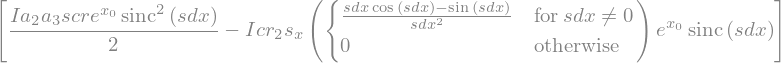

In [20]:
dx = x - sympy.exp(x0)          #<--------------- CHANGED!
sdx = sx * dx
    
sinc_val = sympy.sinc(sdx)
term1 = sympy.Rational(1, 2) * sinc_val**2
term2_inner = a2 * sympy.cos(a3 * dx + phase)
term2 = 1 + term2_inner 
    
y = intensity * term1 * term2 + offset



dy_dx0 = sympy.diff(y, x0)

dy_dx0=[dy_dx0.subs(x, dx_r + sympy.exp(x0))#------------
    .subs(dx_r * sx, dxs_r)
    .subs(phase + a3 * dx_r, cr) 
    .subs(a2 * sympy.cos(cr) + 1, cr2)
    .subs(sympy.sin(cr), scr)
    .subs(sympy.cos(cr), ccr)]
dy_dx0

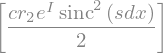

In [21]:
dx = x - x0        
sdx = sx * dx
    
sinc_val = sympy.sinc(sdx)
term1 = sympy.Rational(1, 2) * sinc_val**2
term2_inner = a2 * sympy.cos(a3 * dx + phase)
term2 = 1 + term2_inner 
    
y = sympy.exp(intensity) * term1 * term2 + offset  #<--------------- CHANGED!



dy_dI = sympy.diff(y, intensity)

dy_dI=[dy_dI.subs(x, dx_r + x0)#------------
    .subs(dx_r * sx, dxs_r)
    .subs(phase + a3 * dx_r, cr) 
    .subs(a2 * sympy.cos(cr) + 1, cr2)
    .subs(sympy.sin(cr), scr)
    .subs(sympy.cos(cr), ccr)]
dy_dI

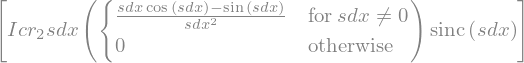

In [22]:
dx = x - x0        
sdx = sympy.exp(sx) * dx   #<--------------- CHANGED!
    
sinc_val = sympy.sinc(sdx)
term1 = sympy.Rational(1, 2) * sinc_val**2
term2_inner = a2 * sympy.cos(a3 * dx + phase)
term2 = 1 + term2_inner 
    
y = intensity * term1 * term2 + offset 



dy_dsx = sympy.diff(y, sx)

dy_dsx=[dy_dsx.subs(x, dx_r + x0)
    .subs(dx_r * sympy.exp(sx), dxs_r)  #<------------
    .subs(phase + a3 * dx_r, cr) 
    .subs(a2 * sympy.cos(cr) + 1, cr2)
    .subs(sympy.sin(cr), scr)
    .subs(sympy.cos(cr), ccr)]
dy_dsx

In [25]:
dx = x - x0        
sdx = sx * dx      
    
sinc_val = sympy.sinc(sdx)
term1 = sympy.Rational(1, 2) * sinc_val**2
term2_inner = a2 * sympy.cos(a3 * dx + phase)
term2 = 1 + term2_inner 
    
y = intensity * term1 * term2 + sympy.exp(offset) #<--------------- CHANGED!



dy_dy0= sympy.diff(y, offset)

dy_dy0=[dy_dy0.subs(x, dx_r + x0)
    .subs(dx_r * sx, dxs_r)  #<------------
    .subs(phase + a3 * dx_r, cr) 
    .subs(a2 * sympy.cos(cr) + 1, cr2)
    .subs(sympy.sin(cr), scr)
    .subs(sympy.cos(cr), ccr)]
dy_dy0

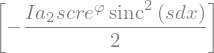

In [26]:
dx = x - x0        
sdx = sx * dx      
    
sinc_val = sympy.sinc(sdx)
term1 = sympy.Rational(1, 2) * sinc_val**2
term2_inner = a2 * sympy.cos(a3 * dx + sympy.exp(phase))#<--------------- CHANGED!
term2 = 1 + term2_inner 
    
y = intensity * term1 * term2 + offset 



dy_dphase = sympy.diff(y, phase)

dy_dphase=[dy_dphase.subs(x, dx_r + x0)
    .subs(dx_r * sx, dxs_r)  
    .subs(sympy.exp(phase) + a3 * dx_r, cr) #<------------
    .subs(a2 * sympy.cos(cr) + 1, cr2)
    .subs(sympy.sin(cr), scr)
    .subs(sympy.cos(cr), ccr)]
dy_dphase

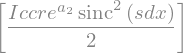

In [27]:
dx = x - x0        
sdx = sx * dx      
    
sinc_val = sympy.sinc(sdx)
term1 = sympy.Rational(1, 2) * sinc_val**2
term2_inner = sympy.exp(a2) * sympy.cos(a3 * dx + phase)#<--------------- CHANGED!
term2 = 1 + term2_inner 
    
y = intensity * term1 * term2 + offset 



dy_da2 = sympy.diff(y, a2)

dy_da2=[dy_da2.subs(x, dx_r + x0)
    .subs(dx_r * sx, dxs_r)  
    .subs(phase + a3 * dx_r, cr)
    .subs(sympy.exp(a2) * sympy.cos(cr) + 1, cr2) #<------------
    .subs(sympy.sin(cr), scr)
    .subs(sympy.cos(cr), ccr)]
dy_da2

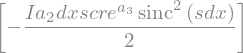

In [28]:
dx = x - x0        
sdx = sx * dx      
    
sinc_val = sympy.sinc(sdx)
term1 = sympy.Rational(1, 2) * sinc_val**2
term2_inner = a2 * sympy.cos(sympy.exp(a3) * dx + phase)#<--------------- CHANGED!
term2 = 1 + term2_inner 
    
y = intensity * term1 * term2 + offset 



dy_da3 = sympy.diff(y, a3)

dy_da3=[dy_da3.subs(x, dx_r + x0)
    .subs(dx_r * sx, dxs_r)  
    .subs(phase + sympy.exp(a3) * dx_r, cr)#<------------
    .subs(a2 * sympy.cos(cr) + 1, cr2) 
    .subs(sympy.sin(cr), scr)
    .subs(sympy.cos(cr), ccr)]
dy_da3